**Assignment 1 Set 6**

# **Deep Learning (S1-21_DSECLZG524) - DL Group 168 - SEC-3**

Group members: 


*   Ashwini BR - 2020fc04180@wilp.bits-pilani.ac.in
*   Ashutosh Kumar - 2020fc04341@wilp.bits-pilani.ac.in
*   Rahul Paul -2020fc04350@wilp.bits-pilani.ac.in

**Question No.2.** Dataset: data2_0.4_5.csv  Download data2_0.4_5.csv 

1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.
 

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]

In [31]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mlc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix #, precision_score, recall_score, f1_score, precision_recall_curve, auc
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from keras.layers import Activation, Dense 
from sklearn import preprocessing
from keras import models
import matplotlib as mpl
import matplotlib.colors
import warnings
from mlxtend.plotting import plot_decision_regions
from tensorflow import keras
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#import keras_tuner as ktt

In [32]:
#@title
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [33]:
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/data2_0.4_5.csv"
data = pd.read_csv(file_path, header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data.columns = ["feature 1", "feature 2", "class"]

In [35]:
labels = data['class']
y=np.ravel(labels)
df= data.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42) 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature 1  499 non-null    float64
 1   feature 2  499 non-null    float64
 2   class      499 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [37]:
data.describe()

,feature 1,feature 2,class
count,499.00,499.00,499.00
mean,-0.00,0.01,0.50
std,6.47,6.39,0.50
min,-15.81,-14.07,0.00
25%,-3.90,-4.18,0.00
50%,0.04,0.00,1.00
75%,3.97,4.10,1.00
max,15.61,14.27,1.00


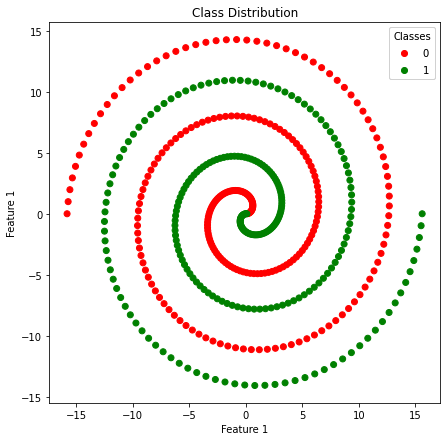

In [38]:
#Data Visualization without Feature Transformation
zero_one_colourmap = mlc.ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 7, 7
fig, ax = plt.subplots()
scatter = ax.scatter(df["feature 1"],df["feature 2"], c=y,cmap = zero_one_colourmap)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 1")
plt.title("Class Distribution")
plt.show()

**Two double hidden layer deep networks with 4 hidden nodes in each layer**

In [39]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))
#,input_dim=2
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0)
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


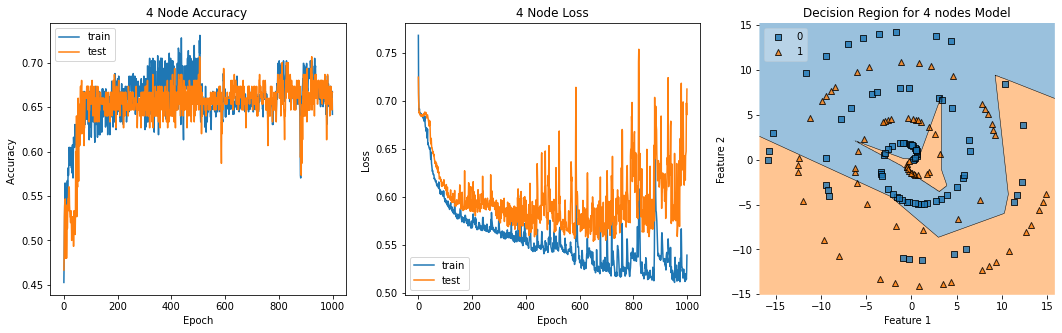

In [41]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy ")
plt.title( "4 Node Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss ")
plt.title("4 Node Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(X_test.values, y_test.ravel(), clf = model, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for 4 nodes Model")
plt.show()
plt.show()

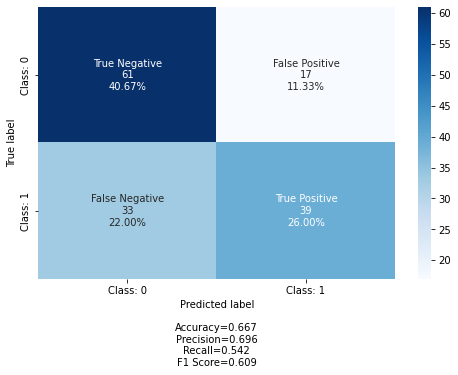

In [42]:
plt.rcParams["figure.figsize"] = (8,5)
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm_4=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Class: 0','Class: 1']
make_confusion_matrix(cm_4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Two double hidden layer deep networks with 8 hidden nodes in each layer**

In [43]:
model8 = Sequential()
model8.add(Dense(8, input_shape=(2,), activation='relu'))
model8.add(Dense(8, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model8.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0)
model8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


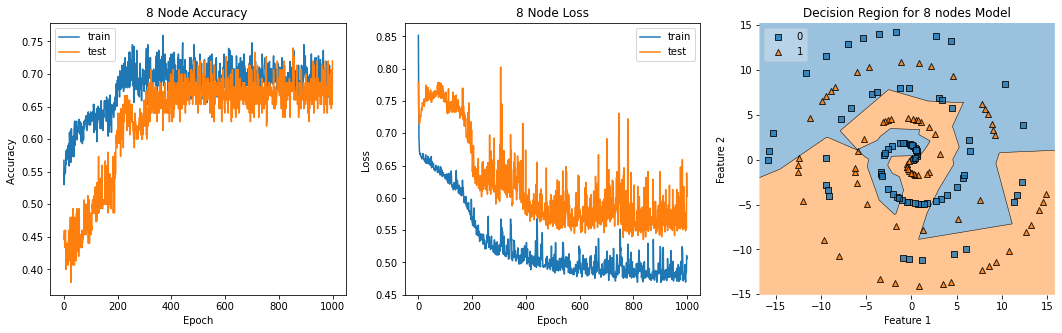

In [44]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(history8.history['accuracy'], label='train')
plt.plot(history8.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy ")
plt.title("8 Node Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history8.history['loss'], label='train')
plt.plot(history8.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss ")
plt.title("8 Node Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(X_test.values, y_test.ravel(), clf = model8, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for 8 nodes Model")
plt.show()
plt.show()

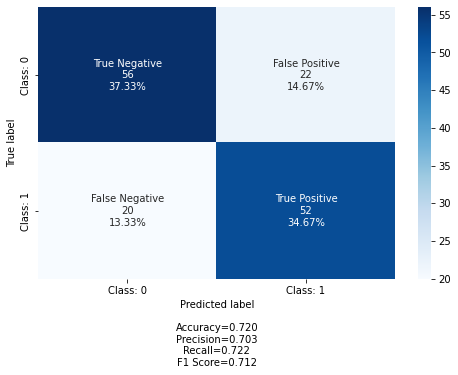

In [45]:
plt.rcParams["figure.figsize"] = (8,5)
y_pred = model8.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm_8=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Class: 0','Class: 1']
make_confusion_matrix(cm_8, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Two double hidden layer deep networks with 12 hidden nodes in each layer**

In [46]:
model12 = Sequential()
model12.add(Dense(12, input_shape=(2,), activation='relu'))
model12.add(Dense(12, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model12.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
history12 = model12.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0)
model12.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                36        
                                                                 
 dense_13 (Dense)            (None, 12)                156       
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


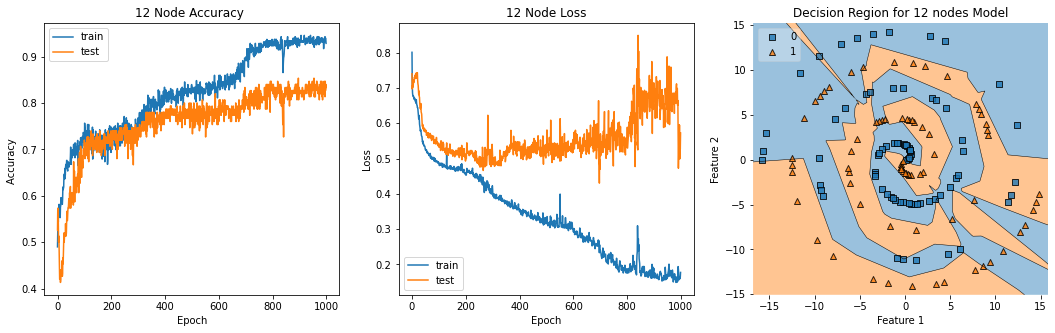

In [47]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(history12.history['accuracy'], label='train')
plt.plot(history12.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy ")
plt.title("12 Node Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history12.history['loss'], label='train')
plt.plot(history12.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("12 Node Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(X_test.values, y_test.ravel(), clf = model12, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for 12 nodes Model")
plt.show()
plt.show()

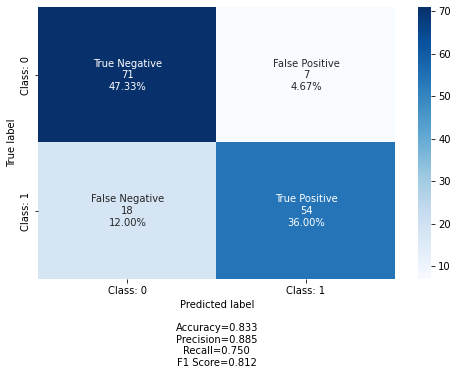

In [48]:
plt.rcParams["figure.figsize"] = (8,5)
y_pred = model12.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm_12=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Class: 0','Class: 1']
make_confusion_matrix(cm_12, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Two double hidden layer deep networks with 16 hidden nodes in each layer**

In [49]:
model16 = Sequential()
model16.add(Dense(16, input_shape=(2,), activation='relu'))
model16.add(Dense(16, activation='relu'))
model16.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model16.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
history16 = model16.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0)
model16.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                48        
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


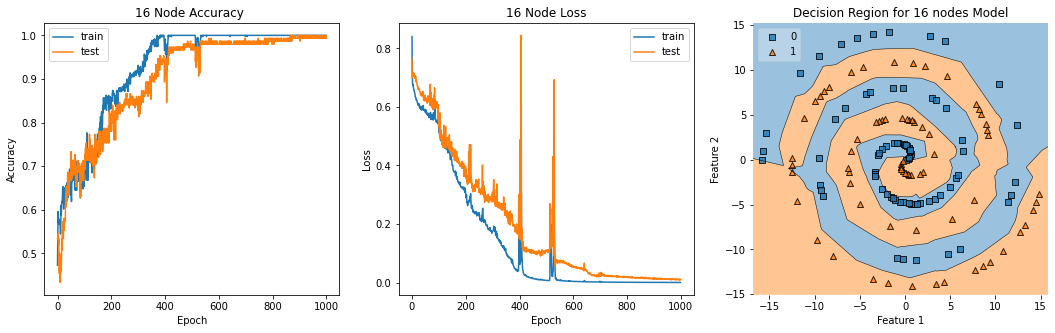

In [50]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(history16.history['accuracy'], label='train')
plt.plot(history16.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("16 Node Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history16.history['loss'], label='train')
plt.plot(history16.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("16 Node Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(X_test.values, y_test.ravel(), clf = model16, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for 16 nodes Model")
plt.show()
plt.show()

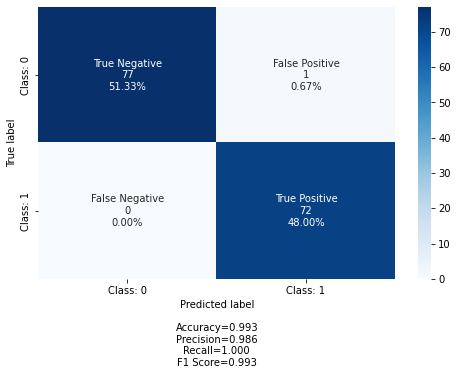

In [51]:
plt.rcParams["figure.figsize"] = (8,5)
y_pred = model16.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm_16=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Class: 0','Class: 1']
make_confusion_matrix(cm_16, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [52]:
score4 = model.evaluate(X_test, y_test, verbose=0)
score8 = model8.evaluate(X_test, y_test, verbose=0)
score12 = model12.evaluate(X_test, y_test, verbose=0)
score16 = model16.evaluate(X_test, y_test, verbose=0)
data_score = [
              ['4', score4[0], score4[1]], 
              ['8', score8[0], score8[1]],
              ['12', score12[0], score12[1]],
              ['16', score16[0], score16[1]]
             ]

In [53]:
pd.options.display.float_format = '{:,.2f} '.format
dfsc = pd.DataFrame(data_score,columns = ['Number of Node', 'Test Loss', 'Test Accuracy'])
print(dfsc)

  Number of Node  Test Loss  Test Accuracy
0              4      0.71           0.67 
1              8      0.60           0.72 
2             12      0.57           0.83 
3             16      0.01           0.99 


**Summary:**

From the above evaluation using double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer, following things are observed:-


>With increase in the number of hidden nodes, accuracy got increased and 16 nodes performed best for fixed epoch.
>Accuracy of 16 Node with Two Hidden layer is the most accurate model.

**Question No.2.** Dataset: data2_0.4_5.csv  Download data2_0.4_5.csv 

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results.

In [14]:
#from sklearn import preprocessing
data = pd.read_csv(file_path, header=None)
data.columns = ["feature 1", "feature 2", "class"]
df = data.drop('class', axis=1)
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()
standard_df = scaler.fit_transform(df.to_numpy())
standard_df = pd.DataFrame(standard_df, columns =['feature 1','feature 2'])
labels = data['class']
yst=np.ravel(labels)
Xscl_train, Xscl_test, yscl_train, yscl_test = train_test_split(df, yst, test_size=0.3, random_state=42) 

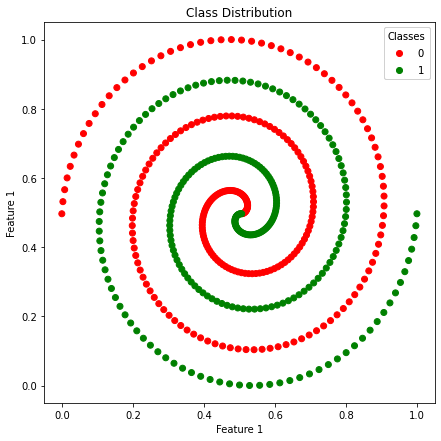

In [15]:
#Dataset Visualization
zero_one_colourmap = mlc.ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 7, 7
fig, ax = plt.subplots()
scatter = ax.scatter(standard_df["feature 1"],standard_df["feature 2"], c=y,cmap = zero_one_colourmap)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel("Feature 1")
plt.ylabel("Feature 1")
plt.title("Class Distribution")
plt.show()

In [16]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt,
              metrics=['accuracy'])

history = model.fit(Xscl_train, yscl_train,
                    validation_data=(Xscl_test, yscl_test),
                    batch_size=32, epochs=1000, verbose=0)



In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                36        
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


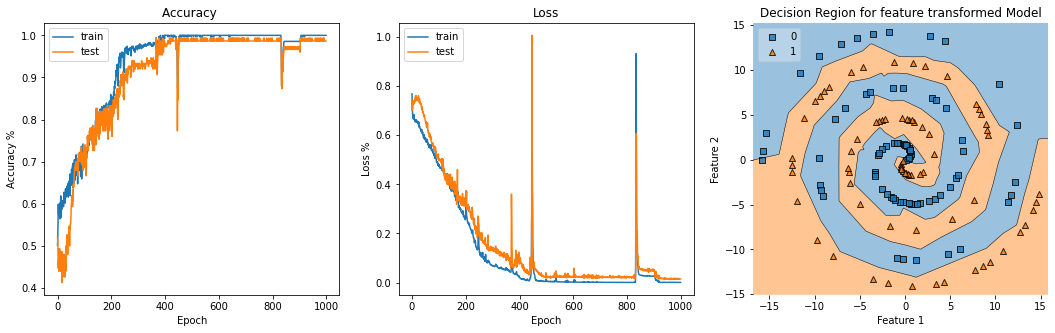

In [18]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss %")
plt.title("Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(Xscl_test.values, yscl_test.ravel(), clf = model, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for feature transformed Model")
plt.show()


In [19]:
scoreTest = model.evaluate(Xscl_test, yscl_test, verbose=0)
scoreTrain = model.evaluate(Xscl_train, yscl_train, verbose=0)

In [30]:
print("Train Error: {:.2f} %".format(scoreTrain[0]*100))
print("Validation Error: {:.2f} %".format(scoreTest[0]*100))

Train Error: 0.04 %
Validation Error: 1.45 %


**Summary:**
*   Features are transformed by scaling each feature to a range between [0,1].
*   Accuracy got mildly improved for 12 Node Hidden Layers.
*   Spiral Data tuning is referred from here. (https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.01938&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



# Appendix

# **Hyperparameter Tuning [Learning Rate/Number of Node/Number of Layer]**

In [39]:
!pip install -q -U keras-tuner
import keras_tuner as ktt

     |████████████████████████████████| 98 kB 2.4 MB/s 


In [40]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=4,
                                            max_value=16,
                                            step=4),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [41]:
tuner = ktt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='proje',
    project_name='DL_Assignment')

In [42]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train,
             epochs=1000,
             validation_data=(X_test, y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in proje/DL_Assignment
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 8
learning_rate: 0.001
units_1: 4
units_2: 12
units_3: 8
Score: 0.5888888835906982
Trial summary
Hyperparameters:
num_layers: 2
units_0: 12
learning_rate: 0.0001
units_1: 8
units_2: 12
units_3: 12
Score: 0.5822222232818604
Trial summary
Hyperparameters:
num_layers: 4
units_0: 4
learning_rate: 0.0001
units_1: 16
units_2: 16
units_3: 4
Score: 0.5800000031789144
Trial summary
Hyperparameters:
num_layers: 3
units_0: 4
learning_rate: 0.01
units_1: 4
units_2: 4
Score: 0.5777777632077535
Trial summary
Hyperparameters:
num_layers: 3
units_0: 12
learning_rate: 0.0001
units_1: 4
units_2: 16
Score: 0.5400000015894572


In [ ]:
from tensorflow import keras
modelf = Sequential()
#modelf.add(Dense(8, input_dim=2, activation='relu'))
modelf.add(Dense(4,input_shape=(2,), activation='relu'))
modelf.add(Dense(12, activation='relu'))
modelf.add(Dense(8, activation='relu'))
modelf.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
modelf.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
historyf = model.fit(Xscl_train, yscl_train, 
                    validation_data=(Xscl_test, yscl_test), 
                    epochs=400, verbose=0)

modelf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 12)                60        
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


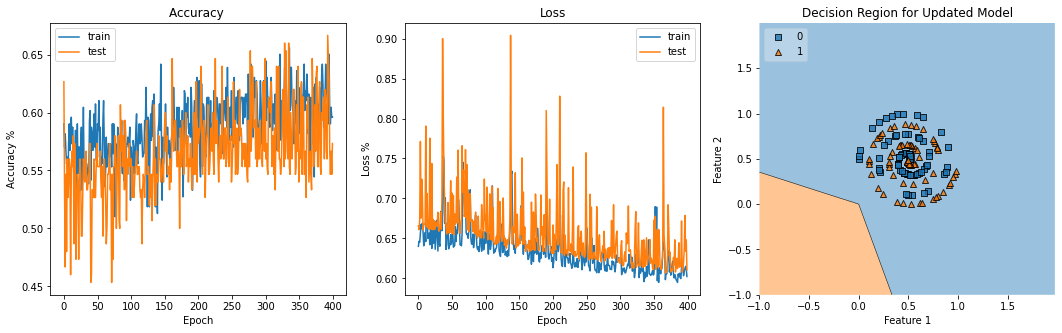

In [ ]:
plt.rcParams["figure.figsize"] = (18,5)
plt.subplot(1, 3, 1)
plt.plot(historyf.history['accuracy'], label='train')
plt.plot(historyf.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Accuracy ")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(historyf.history['loss'], label='train')
plt.plot(historyf.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss %")
plt.title("Loss")
plt.legend()
plt.subplot(1, 3, 3)
plot_decision_regions(Xscl_test.values, yscl_test.ravel(), clf = modelf, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Region for Updated Model")
plt.show()
plt.show()

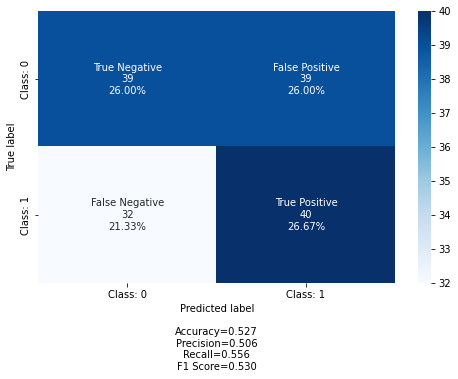

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
yscl_pred = modelf.predict(Xscl_test)
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm_f=confusion_matrix(yscl_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Class: 0','Class: 1']
make_confusion_matrix(cm_f, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
